In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
palette = [
    "#3C38A0",  # deep indigo
#    "#7152B8",  # royal purple (new)
    "#1B7A6E",  # lighter teal
#    "#3A2C20",  # cool dark brown
    "#C26824",  # bright burnt orange
    "#7A014A",  # wine magenta
]

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette)

plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rcParams["font.size"] = 14

1.0056667694537882 0.10600907909112761


/var/folders/rz/wj7nq3j14wx3gj_18_bwmwxm0000gq/T/ipykernel_98668/979175682.py:71: RuntimeWarning: invalid value encountered in power
  f2 = 2 * x * np.log(10) - C + (a * ((X1 - x)**m))


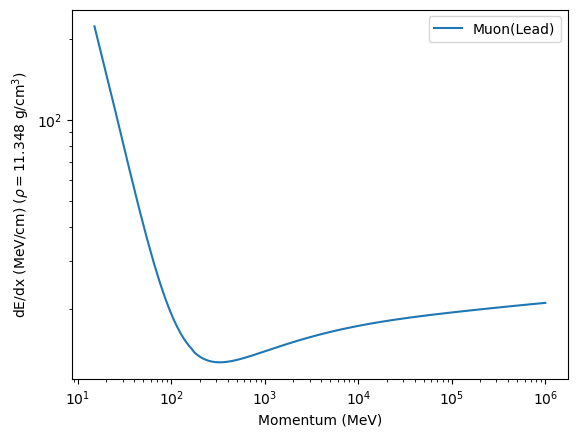

np.float64(0.7059732966763472)

In [4]:
def I(iZ,iPlot=False):
    #https://github.com/nrc-cnrc/EGSnrc/blob/master/HEN_HOUSE/pegs4/pegs4.mortran#L1354-L1391
    lI=[19.2,41.8,40.,63.7,76.0,78.0,82.0,95.0,115.,137.,
     149.,156.,166.,173.,173.,180.,174.,188.,190.,191.,216.,233.,245.,
     257.,272.,286.,297.,311.,322.,330.,334.,350.,347.,348.,357.,352.,
     363.,366.,379.,393.,417.,424.,428.,441.,449.,470.,470.,469.,488.,
     488.,487.,485.,491.,482.,488.,491.,501.,523.,535.,546.,560.,574.,
     580.,591.,614.,628.,650.,658.,674.,684.,694.,705.,718.,727.,736.,
     746.,757.,790.,790.,800.,810.,823.,823.,830.,825.,794.,827.,826.,
     841.,847.,878.,890.,902.,921.,934.,939.,952.,966.,980.,994.]
    lZ=np.arange(1,len(lI)+1)
    if iPlot:
        plt.plot(lZ,lI/lZ)
        plt.xlabel('Z')
        plt.ylabel('I$_{adj}$/Z (eV/Z)')
        plt.show()
    return lI[iZ]*1e-6 #MeV not eV
def A(iZ,iPlot=False):
    #https://github.com/nrc-cnrc/EGSnrc/blob/master/HEN_HOUSE/pegs4/pegs4.mortran#L1354-L1391
    lA=[1.00797,4.0026,6.939,9.0122,10.811,12.01115,14.0067,
     15.9994,18.9984,20.183,22.9898,24.312,26.9815,28.088,30.9738,
     32.064,35.453,39.948,39.102,40.08,44.956,47.90,50.942,51.998,
     54.9380,55.847,58.9332,58.71,63.54,65.37,69.72,72.59,74.9216,
     78.96,79.808,83.80,85.47,87.62,88.905,91.22,92.906,95.94,99.0,
     101.07,102.905,106.4,107.87,112.4,114.82,118.69,121.75,127.60,
     126.9044,131.30,132.905,137.34,138.91,
     140.12,140.907,144.24,147.,150.35,151.98,157.25,158.924,162.50,
     164.930,167.26,168.934,173.04,174.97,178.49,180.948,183.85,
     186.2,190.2,192.2,195.08,196.987,200.59,204.37,207.19,208.980,
     210.,210.,222.,223.,226.,227.,232.036,231.,238.03,237.,242.,
     243.,247.,247.,248.,254.,253.
    ]
    lZ=np.arange(1,len(lA)+1)
    if iPlot:
        plt.plot(lZ,lA/lZ)
        plt.xlabel('Z')
        plt.ylabel('A/Z (Atomic mass/Z)')
        plt.show()
    return lA[iZ-1]

#https://indico.cern.ch/event/753612/contributions/3121551/attachments/1974578/3285956/MC_2019.pdf
#https://www.nature.com/articles/s41598-017-10554-0

m_e = 0.511 # Mass of electron in MeV

def gamma(ip,im): #E^2=gamma^2m^2=p^2+m^2
    return np.sqrt(1+(ip/im)**2)

def beta(ip,im): #gamma=1/sqrt(1-b^2)
    g=gamma(ip,im)
    return np.sqrt(1-1./g**2)

def betagamma(ip,im):#p=bgm
    return ip/im

def Tmax(ip,im): # Maximum energy transfer in one collision in MeV
    return 2*m_e*(ip/im)**2/(1+2*gamma(ip,im)*m_e/im+(m_e/im)**2)

def TKinheavy(ip,im): #(T+M)^2=sqrt(p)+sqrt(m)
    return np.sqrt(np.sqrt(ip)+np.sqrt(um))-im

def delta(ip,im):
    C = 4.44
    a = 0.1492
    m = 3.25
    X1 = 2.87
    X0 = 0.2014
    delta0 = 0.14
    x = np.log10(ip/im)
    #f1 = lambda x: delta0 * 10**(2*(x-X0)) # conductors pdg
    f2 = 2 * x * np.log(10) - C + (a * ((X1 - x)**m))
    f3 = 2 * x * np.log(10) - C
    delta_full = np.where(x < X0, 0, f2)
    delta_full = np.where(x < X1 ,delta_full, f3)
    return delta_full

def dEdxF(ip,im,iZ=82,zpart=1,rho=11.348,nodelta=False): #Bethe-Bloch equation
    K = 0.307075 # constant K in MeV cm mol^-1
#    rho = 11.348 # Density of material in g cm^-3 (here: lead density)
    const   = zpart**2 * (K * rho * iZ ) / (2 * A(iZ)) * (1./beta(ip,im)**2)
    logterm = 2 * m_e * Tmax(ip,im) * ((ip/im)**2)/(I(iZ)**2)
    dEdxV   =  const * (np.log(logterm)  - 2*(beta(ip,im))**2 - delta(ip,im))
    if nodelta:
        print("delta:",delta(ip,im),dEdxV)
        dEdxV    =  const * (np.log(logterm) - 2*(beta(ip,im))**2)
    return dEdxV

mproton=938
mpion=135.4
mmuon=105.4
print(gamma(100,mproton),beta(100,mproton))
p=np.arange(15,1000000,10)
#dEdxOut1p = dEdxF(p,mproton,8,1)
#dEdxOut2p = dEdxF(p,mproton,18,1)
#dEdxOut1pi = dEdxF(p,mpion,8,1)
#dEdxOut2pi = dEdxF(p,mpion,18,1)
#dEdxOut1mu = dEdxF(p,mmuon,8,1)
dEdxOut2mu = dEdxF(p,mmuon,82,1,11.348,False)

#plt.plot(p,dEdxOut1p,label="Proton")
#plt.plot(p,dEdxOut2p,label="Proton(Calcium)")

#plt.plot(p,dEdxOut1pi,label="Pion")
#plt.plot(p,dEdxOut2pi,label="Pion(Calcium)")

#plt.plot(p,dEdxOut1mu,label="Muon")
plt.plot(p,dEdxOut2mu,label="Muon(Lead)")

plt.xlabel('Momentum (MeV)')
plt.ylabel(r'dE/dx (MeV/cm) ($\rho=11.348$ g/cm$^{3}$)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show() 

beta(935,mproton)

1 GeV Muon Momemtum: 1100.3635762783138
10 GeV Muon Momemtum: 10104.8503205144


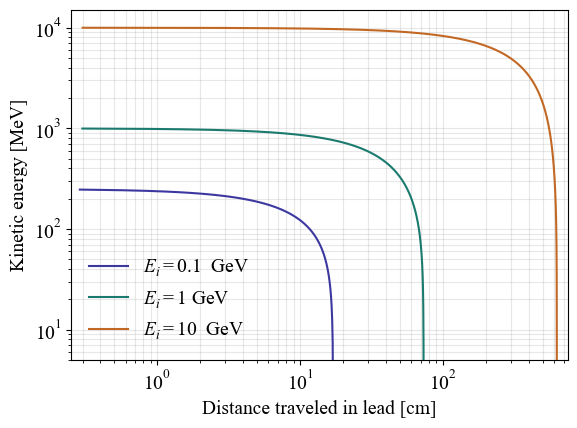

In [47]:
def dP(dE,ip,im): #solving
    #dp = ip - np.sqrt(dE**2+ip**2-2*dE*np.sqrt(ip**2+im**2))
    #E=p^2/2m=> p=\sqrt(2mE)=>dp=sqrt(2m)/sqrt(E) dE
    #return dE*(np.sqrt(ip**2+im**2)/ip)*gamma(ip,im)
    return dE#*(ip/im)

def eToP(iE,im):
    return np.sqrt((iE+im)**2-im**2)

def sim(ie=500,im=935,idt=1e-12,iZ=82):
    xstep  = np.array([])
    estep  = np.array([])
    pstep  = np.array([])
    c=3e10
    dist=0
    e=ie
    while e > 5: #stop at 5 MeV
        p = eToP(e,im)
        dEdxS  = dEdxF(p,im,iZ=iZ,rho=11.348)
        #print(dEdxS)
        dx     = beta(p,im)*c*idt#speed of light
        #print(dEdxS,dP(dEdxS*dx,p,im))
        e      -= dEdxS*dx
        dist   += dx
        xstep  = np.append(xstep,dist)
        estep  = np.append(estep,dEdxS*dx)
        pstep  = np.append(pstep,e)
    return xstep,pstep,estep

print("1 GeV Muon Momemtum:",eToP(1000,mmuon))
print("10 GeV Muon Momemtum:",eToP(10000,mmuon))

xstep1,pstep1,estep1 = sim(ie=250,im=mmuon,idt=1e-11,iZ=82)
xstep2,pstep2,estep2 = sim(ie=1000,im=mmuon,idt=1e-11,iZ=82)
xstep4,pstep4,estep4 = sim(ie=10000,im=mmuon,idt=1e-11,iZ=82)


plt.figure(figsize=(6, 4.5))
plt.plot(xstep1,pstep1,label=r'$E_i = 0.1$  GeV')
plt.plot(xstep2,pstep2,label=r'$E_i = 1 $ GeV')
plt.plot(xstep4,pstep4,label=r'$E_i = 10$  GeV')

plt.xlabel('Distance traveled in lead [cm]')
plt.ylabel('Kinetic energy [MeV]')
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon = False)
plt.xlim(0.25,750)
plt.ylim(5,1.5*1e4)
plt.grid(which='both', alpha=0.3)
plt.tight_layout()
plt.savefig("KE_lead.pdf")
plt.show()





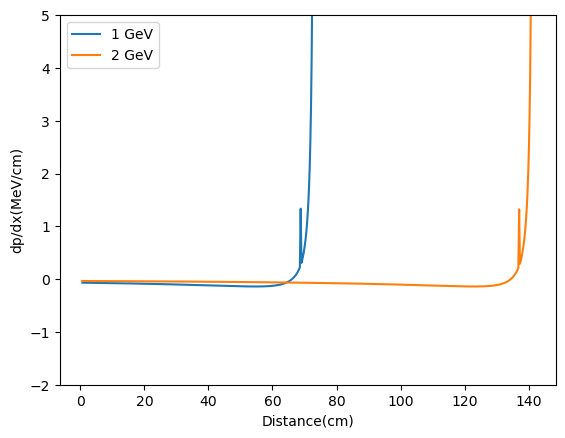

In [12]:
plt.plot(xstep1[1:],(estep1[1:]-estep1[:-1])/(xstep1[1:]-xstep1[:-1])*10 ,label='1 GeV')
plt.plot(xstep2[1:],(estep2[1:]-estep2[:-1])/(xstep2[1:]-xstep2[:-1])*10 ,label='2 GeV')

#plt.plot(xstep6,estep6,label='6 GeV')
#plt.plot(xstep10,estep10,label='10 GeV')

plt.xlabel('Distance(cm)')
plt.ylabel('dp/dx(MeV/cm)')
plt.ylim(-2,5)
plt.legend()
plt.show()

In [13]:
def sim_fixx(ie=500,im=935,idx=1e-6,iZ=82):
    xstep  = np.array([])
    estep  = np.array([])
    pstep  = np.array([])
    dist=0
    e=ie
    while e > 5: #stop at 5 MeV
        p = eToP(e,im)
        dEdxS  = dEdxF(p,im,iZ=iZ,rho=11.348)
        dx     = idx
        e      -= dEdxS*dx
        dist   += dx
        xstep  = np.append(xstep,dist)
        estep  = np.append(estep,dEdxS*dx)
        pstep  = np.append(pstep,p)
    return xstep,pstep,estep

1 GeV Muon Momemtum: 1100.3635762783138
10 GeV Muon Momemtum: 10104.8503205144


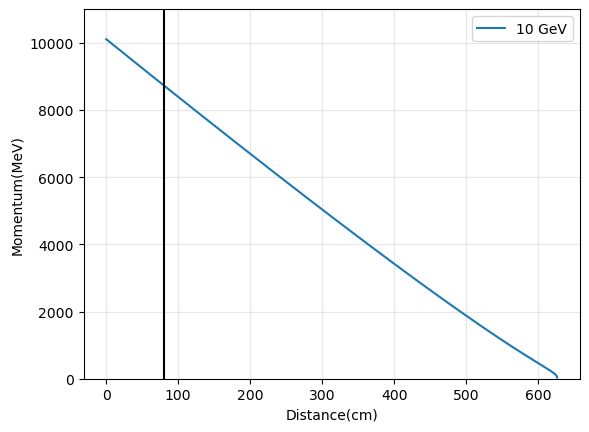

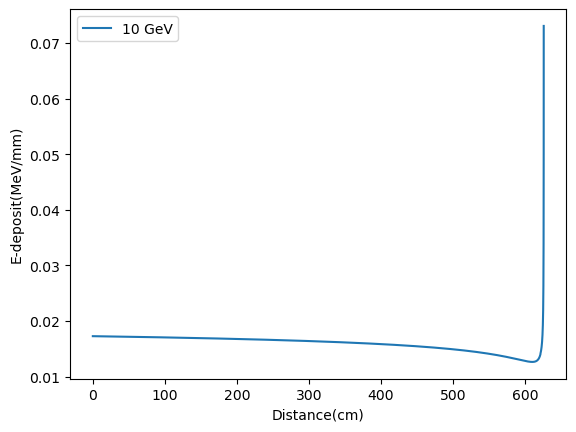

In [18]:
print("1 GeV Muon Momemtum:",eToP(1000,mmuon))
print("10 GeV Muon Momemtum:",eToP(10000,mmuon))

#xstep1,pstep1,estep1 = sim_fixx(ie=1000,im=mmuon,idx=1e-3,iZ=82)
#xstep2,pstep2,estep2 = sim_fixx(ie=2000,im=mmuon,idx=1e-3,iZ=82)
#xstep4,pstep4,estep4 = sim_fixx(ie=4000,im=mmuon,idx=1e-3,iZ=82)
#xstep6,pstep6,estep6 = sim_fixx(ie=6000,im=mmuon,idx=1e-3,iZ=82)
xstep10,pstep10,estep10 = sim_fixx(ie=10000,im=mmuon,idx=1e-3,iZ=82)


#plt.plot(xstep1,pstep1,label='1 GeV')
#plt.plot(xstep2,pstep2,label='2 GeV')
#plt.plot(xstep4,pstep4,label='4 GeV')
#plt.plot(xstep6,pstep6,label='6 GeV')
plt.plot(xstep10,pstep10,label='10 GeV')

plt.xlabel('Distance(cm)')
plt.ylabel('Momentum(MeV)')
#plt.yscale('log')
plt.axvline(80, color = 'black')
plt.legend()
plt.ylim(0,1.1*1e4)
plt.grid(which='both', alpha=0.3)
plt.show()


#plt.plot(xstep1,estep1,label='1 GeV')
#plt.plot(xstep2,estep2,label='2 GeV')
#plt.plot(xstep6,estep6,label='6 GeV')
plt.plot(xstep10,estep10,label='10 GeV')

plt.xlabel('Distance(cm)')
plt.ylabel('E-deposit(MeV/mm)')
plt.legend()
plt.show()
